In [2]:
from IPython.display import Image
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
Image(url= "images/pca0.png")

In [36]:
Image(url= "images/pca1.png")

In [41]:
Image(url= "images/pca2.png")

In [37]:
Image(url= "images/pca3.png")

In [38]:
Image(url= "images/pca4.png")

In [39]:
Image(url= "images/pca5.png")

In [3]:
Image(url= "images/eigenvector.png")

In [40]:
Image(url= "images/pca6.png")

In [20]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [21]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
X = wine.data
y = wine.target
wine_features = X.columns

#⚠️ Data must be centered around its mean before applying PCA ⚠️
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=wine_features)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [36]:
np.allclose(
    pca.transform(X),
    np.dot(X,W)
)

True

<AxesSubplot:>

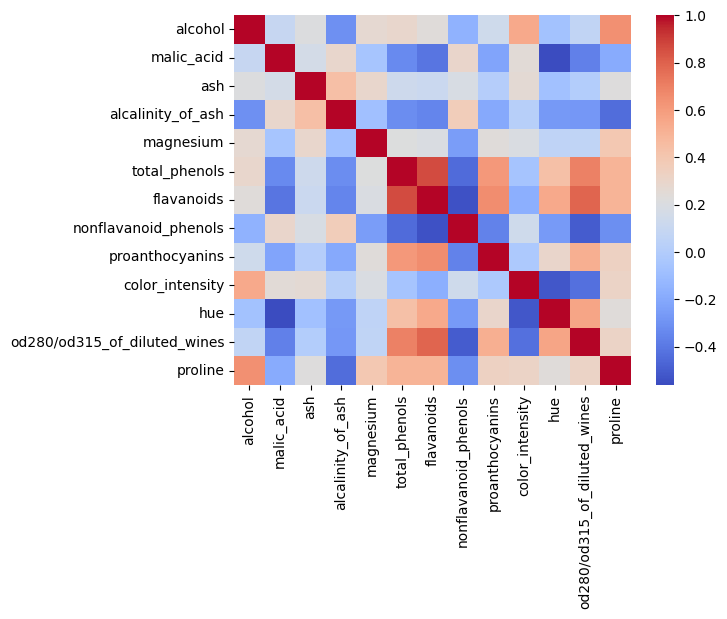

In [22]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [24]:
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


In [26]:
X_proj = pca.transform(X)

In [30]:
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 14)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


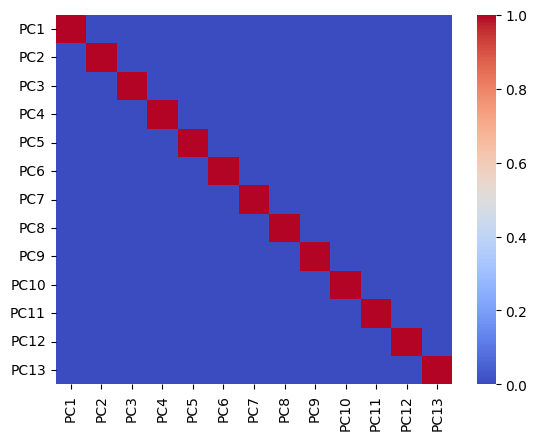

In [31]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

In [40]:
eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T,X))

In [43]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [46]:
X_reconstructed = pca3.inverse_transform(X_proj3)
X_reconstructed.shape

(178, 13)

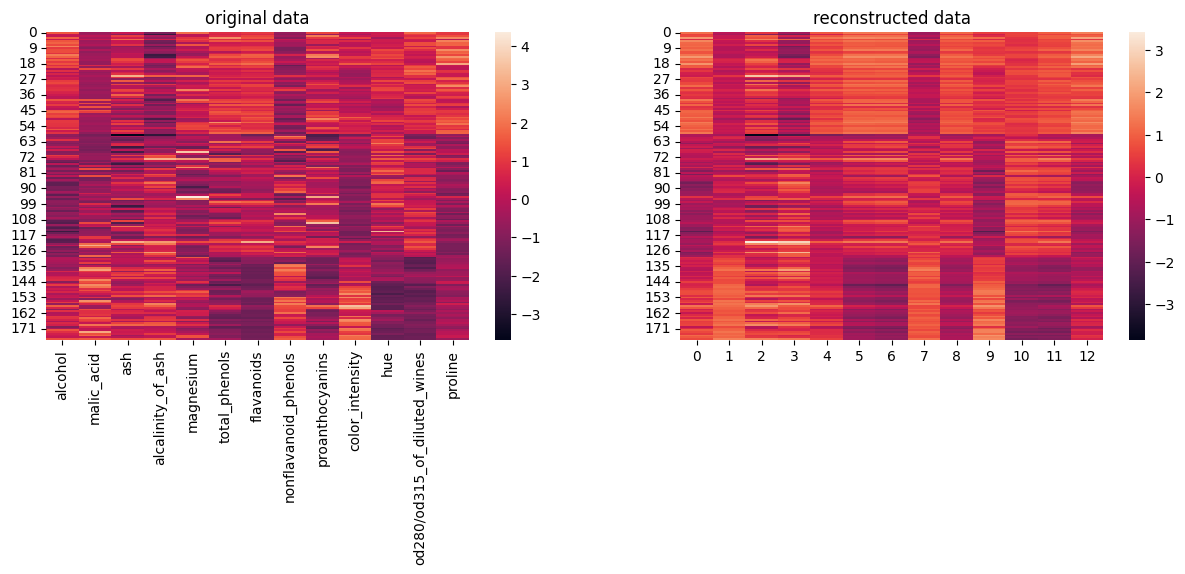

In [48]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.heatmap(X)
plt.title("original data")
plt.subplot(1,2,2)
plt.title("reconstructed data")
sns.heatmap(X_reconstructed);

In [44]:
# Fit a PCA with only 3 components
pca3 = PCA(n_components=3).fit(X)

# Project your data into 3 dimensions
X_proj3 = pd.DataFrame(pca3.fit_transform(X), columns=['PC1', 'PC2', 'PC3'])

# We have "compressed" our dataset in 3D
X_proj3

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

print("accuracy 3 PCs")
print(cross_val_score(LogisticRegression(), X_proj3, y, cv=5).mean())

print("\naccuracy all 13 initial features")
print(cross_val_score(LogisticRegression(), X, y, cv=5).mean())


accuracy 3 PCs
0.9609523809523809

accuracy all 13 initial features
0.9888888888888889


In [41]:
W = pd.DataFrame(eig_vecs, 
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,-0.144329,0.483652,-0.207383,0.017856,-0.265664,0.213539,0.056396,-0.014970,0.396139,-0.266286,-0.508619,-0.225917,0.211605
malic_acid,0.245188,0.224931,0.089013,-0.536890,0.035214,0.536814,-0.420524,-0.025964,0.065827,0.121696,0.075283,0.076486,-0.309080
ash,0.002051,0.316069,0.626224,0.214176,-0.143025,0.154475,0.149171,0.141218,-0.170260,-0.049622,0.307694,-0.498691,-0.027125
alcalinity_of_ash,0.239320,-0.010591,0.612080,-0.060859,0.066103,-0.100825,0.286969,-0.091683,0.427970,-0.055743,-0.200449,0.479314,0.052799
magnesium,-0.141992,0.299634,0.130757,0.351797,0.727049,0.038144,-0.322883,-0.056774,-0.156361,0.062220,-0.271403,0.071289,0.067870
total_phenols,-0.394661,0.065040,0.146179,-0.198068,-0.149318,-0.084122,0.027925,0.463908,-0.405934,-0.303882,-0.286035,0.304341,-0.320131
flavanoids,-0.422934,-0.003360,0.150682,-0.152295,-0.109026,-0.018920,0.060685,-0.832257,-0.187245,-0.042899,-0.049578,-0.025694,-0.163151
nonflavanoid_phenols,0.298533,0.028779,0.170368,0.203301,-0.500703,-0.258594,-0.595447,-0.114040,-0.233285,0.042352,-0.195501,0.116896,0.215535
proanthocyanins,-0.313429,0.039302,0.149454,-0.399057,0.136860,-0.533795,-0.372139,0.116917,0.368227,-0.095553,0.209145,-0.237363,0.134184
color_intensity,0.088617,0.529996,-0.137306,-0.065926,-0.076437,-0.418644,0.227712,0.011993,-0.033797,0.604222,-0.056218,0.031839,-0.290775


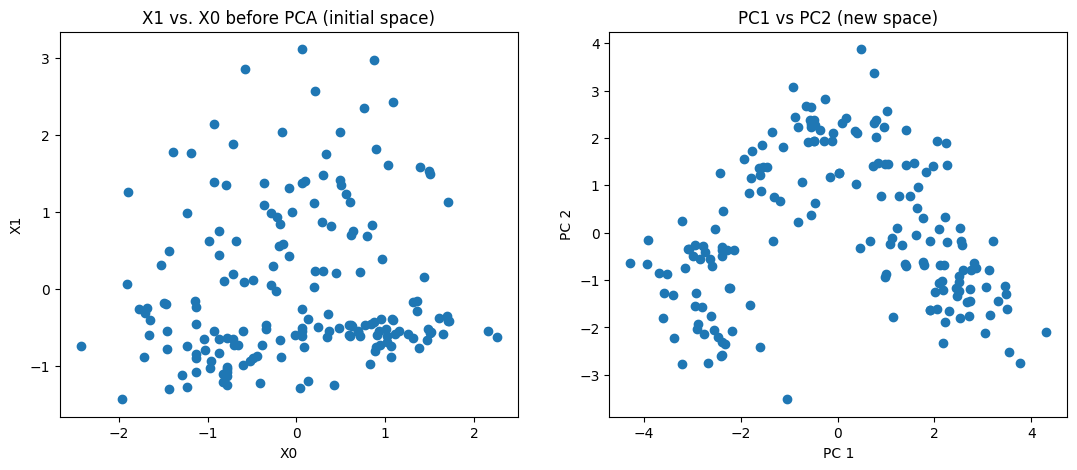

In [32]:
# 2D-slice

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,0], X.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

In [49]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=3)
km.fit(X_proj)

/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [52]:
km.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03, -1.80153234e-02,  3.22512140e-02,
        -2.30035303e-02, -1.39401351e-02, -4.38400536e-03,
        -8.61995490e-03],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02,  2.49642497e-02, -5.02855192e-02,
         7.46793027e-02,  2.12907099e-02,  7.43830113e-03,
         5.06192498e-02],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02, -7.38798948e-03,  2.00269270e-02,
        -6.14683784e-02, -8.11598488e-03, -3.45518279e-03,
        -5.05509102e-02]])

In [53]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

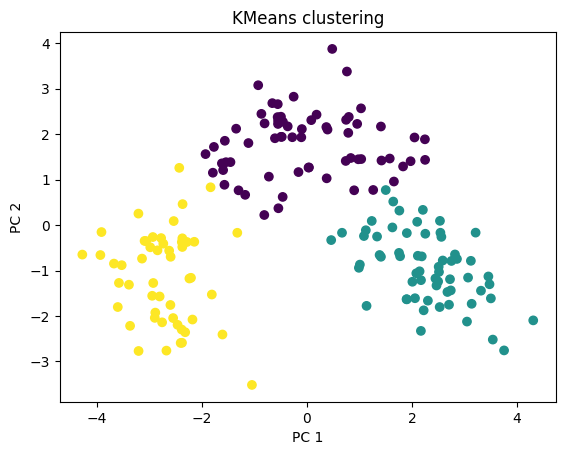

In [54]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

In [59]:
# Accuracy
from sklearn.metrics import accuracy_score

y_pred = pd.Series(km.labels_).map({0:1, 1:0, 2:2}) # WARNING: change this manually!
accuracy_score(y_pred, y)

0.9662921348314607

In [60]:
# Build DF with column names from X_proj and some random data
new_X = pd.DataFrame(data = np.random.random((1,13)), columns = X_proj.columns)

km.predict(new_X)

array([0], dtype=int32)

/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

Text(0.5, 0, 'k cluster number')

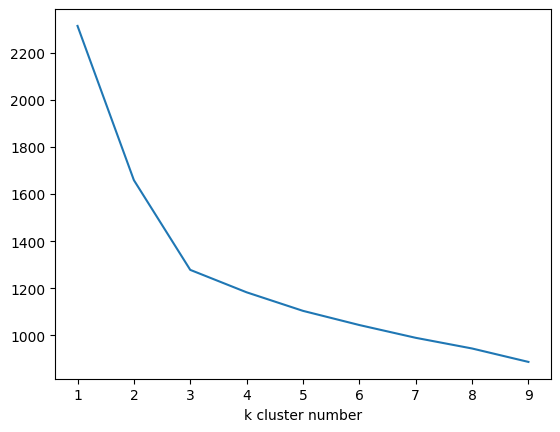

In [61]:
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(X)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [57]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

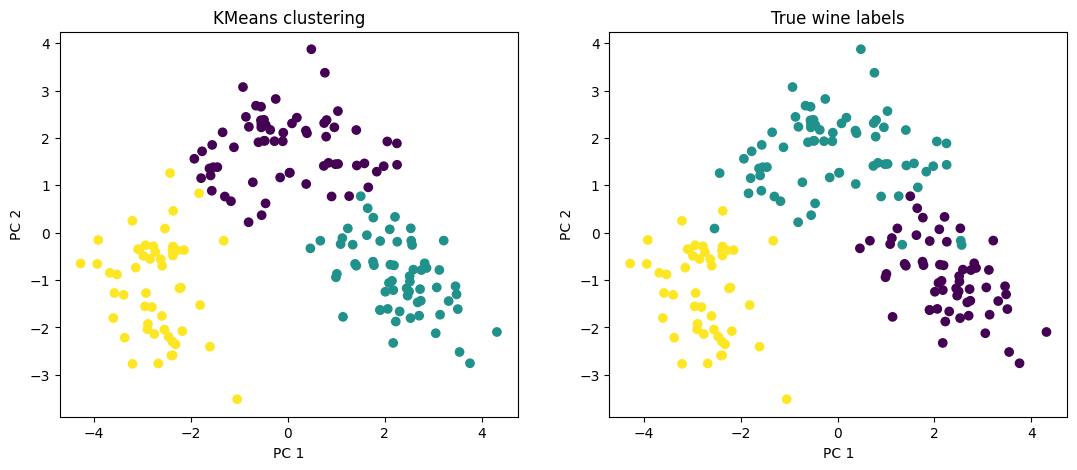

In [55]:
# Visualization
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.subplot(1,2,2)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=y)
plt.title('True wine labels'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

In [16]:
np.diag((1, 2, 3))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(np.diag((1, 2, 3)))

In [18]:
eigenvalues, eigenvectors

(array([1., 2., 3.]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [37]:
eigenvalues, eigenvectors = np.linalg.eig(np.dot(X.T, X))

In [38]:
eigenvalues, eigenvectors

(array([837.64134503, 444.46132455, 257.40081061, 163.57735843,
        151.87461575, 114.21495161,  98.08303953,  18.40127255,
         62.03253067,  30.0411018 ,  51.42062979,  40.19037787,
         44.66064183]),
 array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
          0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
         -0.50861912, -0.22591696,  0.21160473],
        [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
          0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
          0.07528304,  0.07648554, -0.30907994],
        [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
          0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
          0.30769445, -0.49869142, -0.02712539],
        [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
         -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
         -0.20044931,  0.47931378,  0.0527994

In [11]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
alcohol,1.518613,0.246290,0.196879,1.691550,0.295700,1.481555,1.716255,1.308617,2.259772,1.061565,...,0.715690,0.493343,-0.988975,-0.284874,1.432144,0.876275,0.493343,0.332758,0.209232,1.395086
malic_acid,-0.562250,-0.499413,0.021231,-0.346811,0.227694,-0.517367,-0.418624,-0.167278,-0.625086,-0.885409,...,0.218717,2.031997,0.622666,0.048161,0.155881,2.974543,1.412609,1.744744,0.227694,1.583165
ash,0.232053,-0.827996,1.109334,0.487926,1.840403,0.305159,0.305159,0.890014,-0.718336,-0.352802,...,1.182441,1.803849,-0.170035,-0.316249,0.414820,0.305159,0.414820,-0.389355,0.012732,1.365208
alcalinity_of_ash,-1.169593,-2.490847,-0.268738,-0.809251,0.451946,-1.289707,-1.469878,-0.569023,-1.650049,-1.049479,...,1.502943,1.653086,-0.148624,0.001518,0.151661,0.301803,1.052516,0.151661,0.151661,1.502943
magnesium,1.913905,0.018145,0.088358,0.930918,1.281985,0.860705,-0.262708,1.492625,-0.192495,-0.122282,...,0.369212,0.860705,-0.262708,-0.964842,-0.613775,-0.332922,0.158572,1.422412,1.422412,-0.262708
total_phenols,0.808997,0.568648,0.808997,2.491446,0.808997,1.562093,0.328298,0.488531,0.808997,1.097417,...,-1.193917,-0.504914,-1.674617,-1.450290,-0.985614,-0.985614,-0.793334,-1.129824,-1.033684,-0.392751
flavanoids,1.034819,0.733629,1.215533,1.466525,0.663351,1.366128,0.492677,0.482637,0.954502,1.125176,...,-1.193987,-1.073511,-1.545376,-1.525296,-1.334543,-1.424900,-1.284344,-1.344582,-1.354622,-1.274305
nonflavanoid_phenols,-0.659563,-0.820719,-0.498407,-0.981875,0.226796,-0.176095,-0.498407,-0.417829,-0.578985,-1.143031,...,0.226796,-0.740141,0.307374,0.951998,0.629686,1.274310,0.549108,0.549108,1.354888,1.596623
proanthocyanins,1.224884,-0.544721,2.135968,1.032155,0.401404,0.664217,0.681738,-0.597284,0.681738,0.453967,...,-0.089179,-0.842575,-1.508367,-1.666055,-0.614804,-0.930179,-0.316950,-0.422075,-0.229346,-0.422075
color_intensity,0.251717,-0.293321,0.269020,1.186068,-0.319276,0.731870,0.083015,-0.003499,0.061386,0.935177,...,1.558078,1.488867,0.191157,2.094465,2.007951,1.142811,0.969783,2.224236,1.834923,1.791666


In [12]:
wine.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [5]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
X = wine.data
y = wine.target
wine_features = X.columns

In [6]:
X = pd.DataFrame(X, columns=wine_features)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<AxesSubplot:>

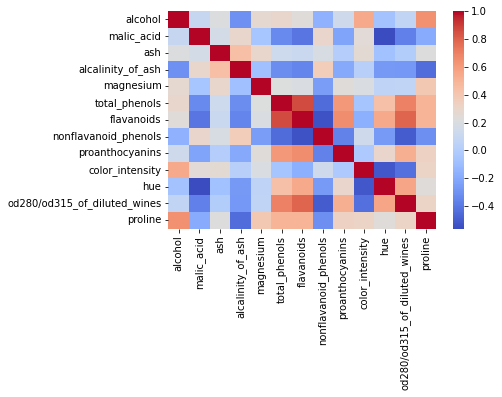

In [16]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [10]:
# Access our 13 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


In [18]:
X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 14)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


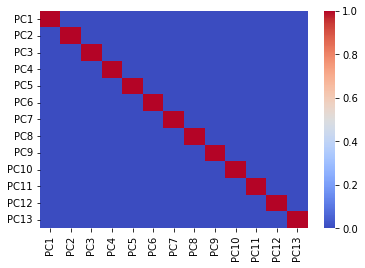

In [30]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

In [38]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [32]:
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


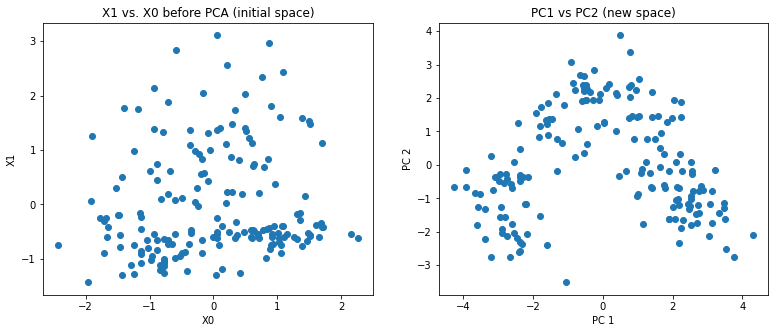

In [42]:
# 2D-slice

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,0], X.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

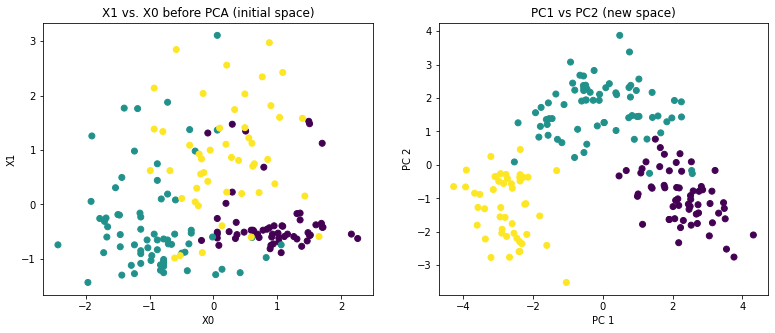

In [43]:
# 2D-slice

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=y);

In [45]:
# Computational proof
W = pca.components_.T
print("Shape of W: ", W.shape)
print("Shape of X", X.shape)

Shape of W:  (13, 13)
Shape of X (178, 13)


In [50]:
np.allclose(
    pca.transform(X),
    np.dot(X,W)
)

True

In [57]:
pd.DataFrame(pca.transform(X)).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717


In [58]:
pd.DataFrame(np.dot(X,W)).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717


In [70]:
Image(url= "covariance.png")

In [59]:
# Compute PCs
eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T,X))

In [60]:
# Show all 13 principal components (unranked)
W = pd.DataFrame(eig_vecs, 
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,-0.144329,0.483652,-0.207383,0.017856,-0.265664,0.213539,0.056396,-0.014970,0.396139,-0.266286,-0.508619,-0.225917,0.211605
malic_acid,0.245188,0.224931,0.089013,-0.536890,0.035214,0.536814,-0.420524,-0.025964,0.065827,0.121696,0.075283,0.076486,-0.309080
ash,0.002051,0.316069,0.626224,0.214176,-0.143025,0.154475,0.149171,0.141218,-0.170260,-0.049622,0.307694,-0.498691,-0.027125
alcalinity_of_ash,0.239320,-0.010591,0.612080,-0.060859,0.066103,-0.100825,0.286969,-0.091683,0.427970,-0.055743,-0.200449,0.479314,0.052799
magnesium,-0.141992,0.299634,0.130757,0.351797,0.727049,0.038144,-0.322883,-0.056774,-0.156361,0.062220,-0.271403,0.071289,0.067870
total_phenols,-0.394661,0.065040,0.146179,-0.198068,-0.149318,-0.084122,0.027925,0.463908,-0.405934,-0.303882,-0.286035,0.304341,-0.320131
flavanoids,-0.422934,-0.003360,0.150682,-0.152295,-0.109026,-0.018920,0.060685,-0.832257,-0.187245,-0.042899,-0.049578,-0.025694,-0.163151
nonflavanoid_phenols,0.298533,0.028779,0.170368,0.203301,-0.500703,-0.258594,-0.595447,-0.114040,-0.233285,0.042352,-0.195501,0.116896,0.215535
proanthocyanins,-0.313429,0.039302,0.149454,-0.399057,0.136860,-0.533795,-0.372139,0.116917,0.368227,-0.095553,0.209145,-0.237363,0.134184
color_intensity,0.088617,0.529996,-0.137306,-0.065926,-0.076437,-0.418644,0.227712,0.011993,-0.033797,0.604222,-0.056218,0.031839,-0.290775


In [61]:
# Let's compute it
X_proj.std()**2 / ((X.std()**2).sum())

PC1     0.361988
PC2     0.192075
PC3     0.111236
PC4     0.070690
PC5     0.065633
PC6     0.049358
PC7     0.042387
PC8     0.026807
PC9     0.022222
PC10    0.019300
PC11    0.017368
PC12    0.012982
PC13    0.007952
dtype: float64

In [62]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

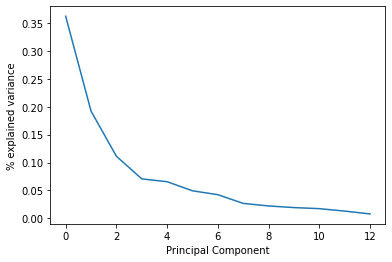

In [63]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

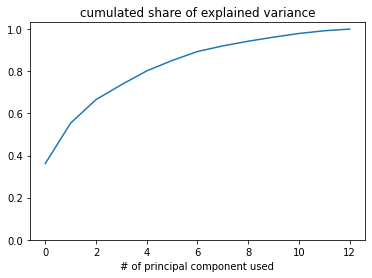

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [11]:
# Fit a PCA with only 3 components
pca3 = PCA(n_components=3).fit(X)

# Project your data into 3 dimensions
X_proj3 = pd.DataFrame(pca3.fit_transform(X), columns=['PC1', 'PC2', 'PC3'])

# We have "compressed" our dataset in 3D
X_proj3

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [13]:
X_proj3.shape

(178, 3)

In [16]:
X_reconstructed = pca3.inverse_transform(X_proj3)
pd.DataFrame(X_reconstructed)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.211209,-0.503300,0.345641,-0.910499,0.881791,1.378646,1.372944,-0.976854,1.071528,0.493866,0.566938,0.982696,1.498816
1,0.577897,-0.797105,-1.378923,-1.765594,-0.051143,0.554080,0.630228,-1.014437,0.376546,-0.094247,0.575977,0.549569,0.768758
2,0.658138,-0.297652,0.936217,-0.011664,0.794835,1.203992,1.209044,-0.554213,0.976233,0.188533,0.542577,0.940248,0.973383
3,1.911918,-0.316876,0.753162,-1.036177,1.336338,1.636284,1.553182,-1.072299,1.259573,1.152119,0.330085,0.930624,2.105486
4,0.146010,0.128681,1.542018,0.989832,0.668891,0.751009,0.729165,0.069124,0.653305,0.093324,0.229189,0.572874,0.349836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.656489,1.294430,0.492888,0.573484,0.140695,-1.236144,-1.484576,1.011634,-1.020516,1.520345,-1.648144,-1.689321,-0.114356
174,0.431299,1.051700,0.690735,0.731148,0.184211,-0.882257,-1.075082,0.862707,-0.715444,1.133398,-1.245028,-1.233369,-0.131209
175,1.143957,1.193829,0.288886,0.035690,0.323993,-1.014817,-1.283609,0.718574,-0.871434,1.829763,-1.645683,-1.617674,0.358844
176,0.880803,1.052992,0.386156,0.209862,0.277418,-0.873144,-1.100250,0.684899,-0.740176,1.504727,-1.396694,-1.367241,0.223624


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

print("accuracy 3 PCs")
print(cross_val_score(LogisticRegression(), X_proj3, y, cv=5).mean())

print("\naccuracy all 13 initial features")
print(cross_val_score(LogisticRegression(), X, y, cv=5).mean())

accuracy 3 PCs
0.9609523809523809

accuracy all 13 initial features
0.9888888888888889


In [68]:
X_reconstructed = pca3.inverse_transform(X_proj3)
X_reconstructed.shape

(178, 13)

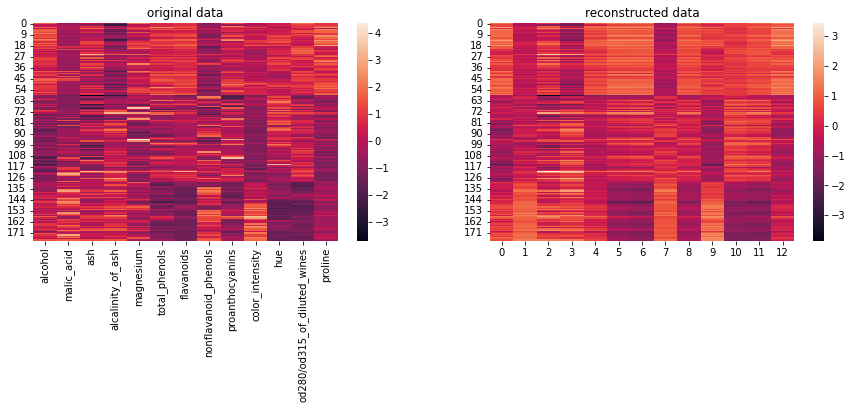

In [69]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.heatmap(X)
plt.title("original data")
plt.subplot(1,2,2)
plt.title("reconstructed data")
sns.heatmap(X_reconstructed);

In [19]:
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [20]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=3)
km.fit(X_proj)

KMeans(n_clusters=3)

In [21]:
km.cluster_centers_.shape

(3, 13)

In [22]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

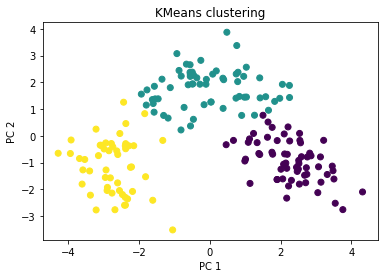

In [23]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

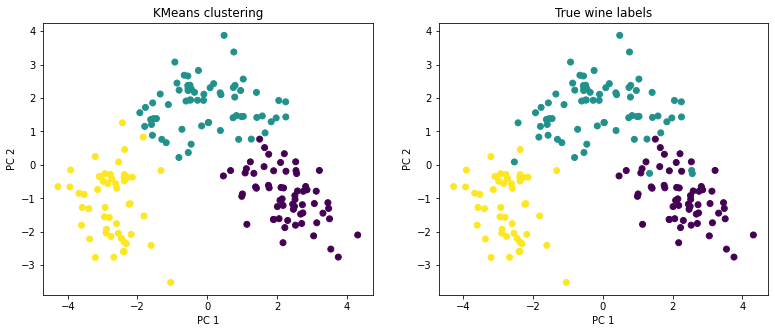

In [24]:
# Visualization
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.subplot(1,2,2)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=y)
plt.title('True wine labels'); plt.xlabel('PC 1'); plt.ylabel('PC 2');


In [25]:
# Accuracy
from sklearn.metrics import accuracy_score

y_pred = pd.Series(km.labels_).map({0:0, 1:2, 2:1}) # WARNING: change this manually!
accuracy_score(y_pred, y)

0.34831460674157305

In [26]:
# Build DF with column names from X_proj and some random data
new_X = pd.DataFrame(data = np.random.random((1,13)), columns = X_proj.columns)

km.predict(new_X)

array([1], dtype=int32)

In [31]:
new_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0.190052,0.918203,0.252647,0.654823,0.418382,0.463713,0.799881,0.548874,0.232449,0.154218,0.33542,0.257677,0.816922


In [33]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

Text(0.5, 0, 'k cluster number')

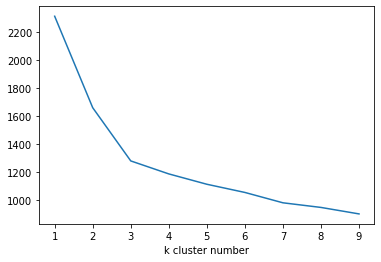

In [27]:
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(X)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [29]:
pd.DataFrame(km.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.276194,-0.932054,0.001528,-0.135498,-0.134912,-0.218283,0.052110,0.024964,-0.050286,0.074679,0.021291,0.007438,0.050619
1,-0.036957,1.772239,0.186139,0.080240,0.070878,0.129806,-0.002327,-0.018015,0.032251,-0.023004,-0.013940,-0.004384,-0.008620
2,-2.720036,-1.125651,-0.239093,0.062457,0.073676,0.099925,-0.060383,-0.007388,0.020027,-0.061468,-0.008116,-0.003455,-0.050551


In [30]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)